### Data Loading & Processing

In [ ]:
# Import Required Libraries
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)

# Libraries fro Data Visualisation
import matplotlib.pyplot as plt
import seaborn as sns

# TO handle warnings
import warnings
warnings.filterwarnings('ignore')

# Libraries for Machine learning models
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix 

In [ ]:
# Load data to dataframe
df = pd.read_csv(r"C:\Users\satanister\Desktop\Diseaseandsymptomsdataset2023.csv")

In [ ]:
# Data rows
df.head()

,diseases,anxiety and nervousness,depression,shortness of breath,depressive or psychotic symptoms,sharp chest pain,dizziness,insomnia,abnormal involuntary movements,chest tightness,palpitations,irregular heartbeat,breathing fast,hoarse voice,sore throat,difficulty speaking,cough,nasal congestion,throat swelling,diminished hearing,lump in throat,throat feels tight,difficulty in swallowing,skin swelling,retention of urine,groin mass,leg pain,hip pain,suprapubic pain,blood in stool,lack of growth,emotional symptoms,elbow weakness,back weakness,pus in sputum,symptoms of the scrotum and testes,swelling of scrotum,pain in testicles,flatulence,pus draining from ear,jaundice,mass in scrotum,white discharge from eye,irritable infant,abusing alcohol,fainting,hostile behavior,drug abuse,sharp abdominal pain,feeling ill,vomiting,headache,nausea,diarrhea,vaginal itching,vaginal dryness,painful urination,involuntary urination,pain during intercourse,frequent urination,lower abdominal pain,vaginal discharge,blood in urine,hot flashes,intermenstrual bleeding,hand or finger pain,wrist pain,hand or finger swelling,arm pain,wrist swelling,arm stiffness or tightness,arm swelling,hand or finger stiffness or tightness,wrist stiffness or tightness,lip swelling,toothache,abnormal appearing skin,skin lesion,acne or pimples,dry lips,facial pain,mouth ulcer,skin growth,eye deviation,diminished vision,double vision,cross-eyed,symptoms of eye,pain in eye,eye moves abnormally,abnormal movement of eyelid,foreign body sensation in eye,irregular appearing scalp,swollen lymph nodes,back pain,neck pain,low back pain,pain of the anus,pain during pregnancy,pelvic pain,impotence,infant spitting up,vomiting blood,regurgitation,burning abdominal pain,restlessness,symptoms of infants,wheezing,peripheral edema,neck mass,ear pain,jaw swelling,mouth dryness,neck swelling,knee pain,foot or toe pain,bowlegged or knock-kneed,ankle pain,bones are painful,knee weakness,elbow pain,knee swelling,skin moles,knee lump or mass,weight gain,problems with movement,knee stiffness or tightness,leg swelling,foot or toe swelling,heartburn,smoking problems,muscle pain,infant feeding problem,recent weight loss,problems with shape or size of breast,underweight,difficulty eating,scanty menstrual flow,vaginal pain,vaginal redness,vulvar irritation,weakness,decreased heart rate,increased heart rate,bleeding or discharge from nipple,ringing in ear,plugged feeling in ear,itchy ear(s),frontal headache,fluid in ear,neck stiffness or tightness,spots or clouds in vision,eye redness,lacrimation,itchiness of eye,blindness,eye burns or stings,itchy eyelid,feeling cold,decreased appetite,excessive appetite,excessive anger,loss of sensation,focal weakness,slurring words,symptoms of the face,disturbance of memory,paresthesia,side pain,fever,shoulder pain,shoulder stiffness or tightness,shoulder weakness,arm cramps or spasms,shoulder swelling,tongue lesions,leg cramps or spasms,abnormal appearing tongue,ache all over,lower body pain,problems during pregnancy,spotting or bleeding during pregnancy,cramps and spasms,upper abdominal pain,stomach bloating,changes in stool appearance,unusual color or odor to urine,kidney mass,swollen abdomen,symptoms of prostate,leg stiffness or tightness,difficulty breathing,rib pain,joint pain,muscle stiffness or tightness,pallor,hand or finger lump or mass,chills,groin pain,fatigue,abdominal distention,regurgitation.1,symptoms of the kidneys,melena,flushing,coughing up sputum,seizures,delusions or hallucinations,shoulder cramps or spasms,joint stiffness or tightness,pain or soreness of breast,excessive urination at night,bleeding from eye,rectal bleeding,constipation,temper problems,coryza,wrist weakness,eye strain,hemoptysis,lymphedema,skin on leg or foot looks infected,allergic reaction,congestion in chest,muscle swelling,pus in urine,abnormal size or shape of ear,low back weakness,sleepiness,apnea,abnormal breathing sounds,excessive growth,elbow cramps or spasms,feeling h

In [ ]:
# Check basic information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246945 entries, 0 to 246944
Columns: 378 entries, diseases to neck weakness
dtypes: int64(377), object(1)
memory usage: 712.2+ MB


In [ ]:
# Check for NULL values
df.isnull().sum()

,0
diseases,0
anxiety and nervousness,0
depression,0
shortness of breath,0
depressive or psychotic symptoms,0
...,...
hip weakness,0
back swelling,0
ankle stiffness or tightness,0
ankle weakness,0


### Data Visualisation - EDA

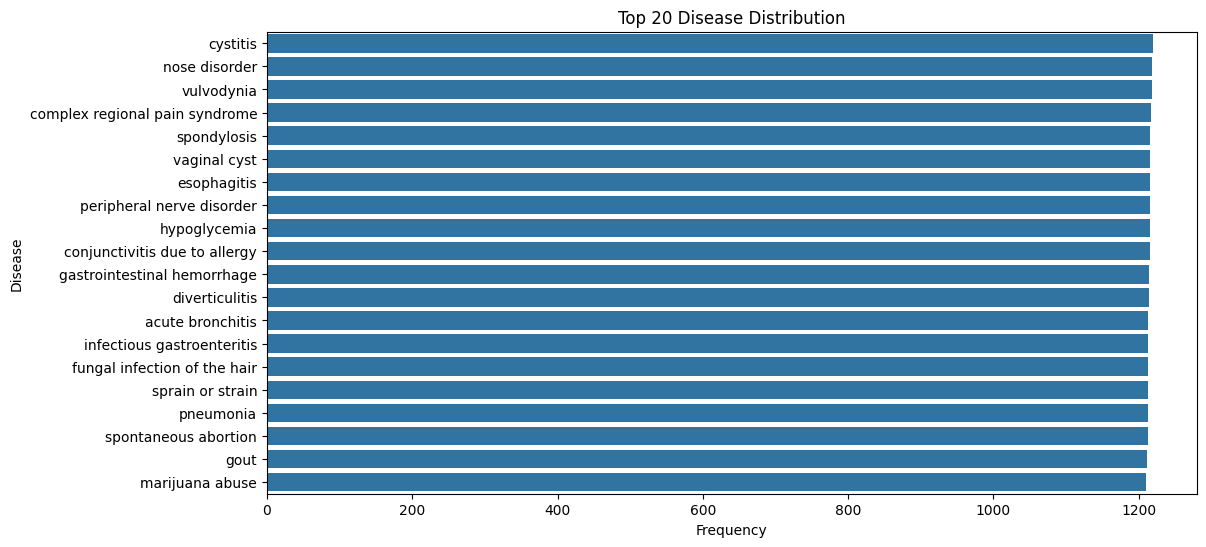

In [ ]:
disease_counts = df['diseases'].value_counts()
top_20_diseases = disease_counts.nlargest(20)

plt.figure(figsize=(12, 6))
sns.countplot(y='diseases', data=df[df['diseases'].isin(top_20_diseases.index)], order=top_20_diseases.index)
plt.title('Top 20 Disease Distribution')
plt.xlabel('Frequency')
plt.ylabel('Disease')
plt.show()

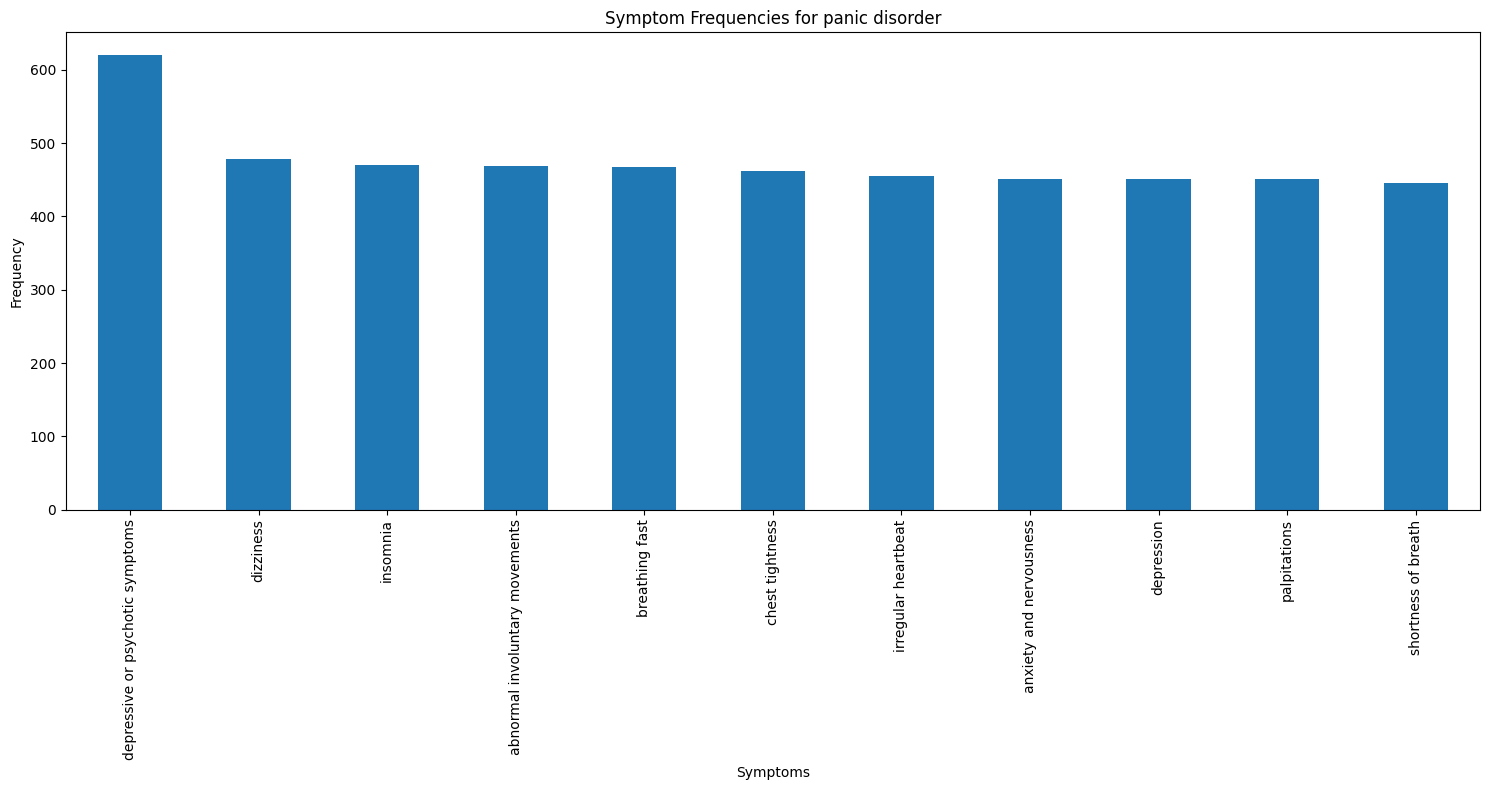

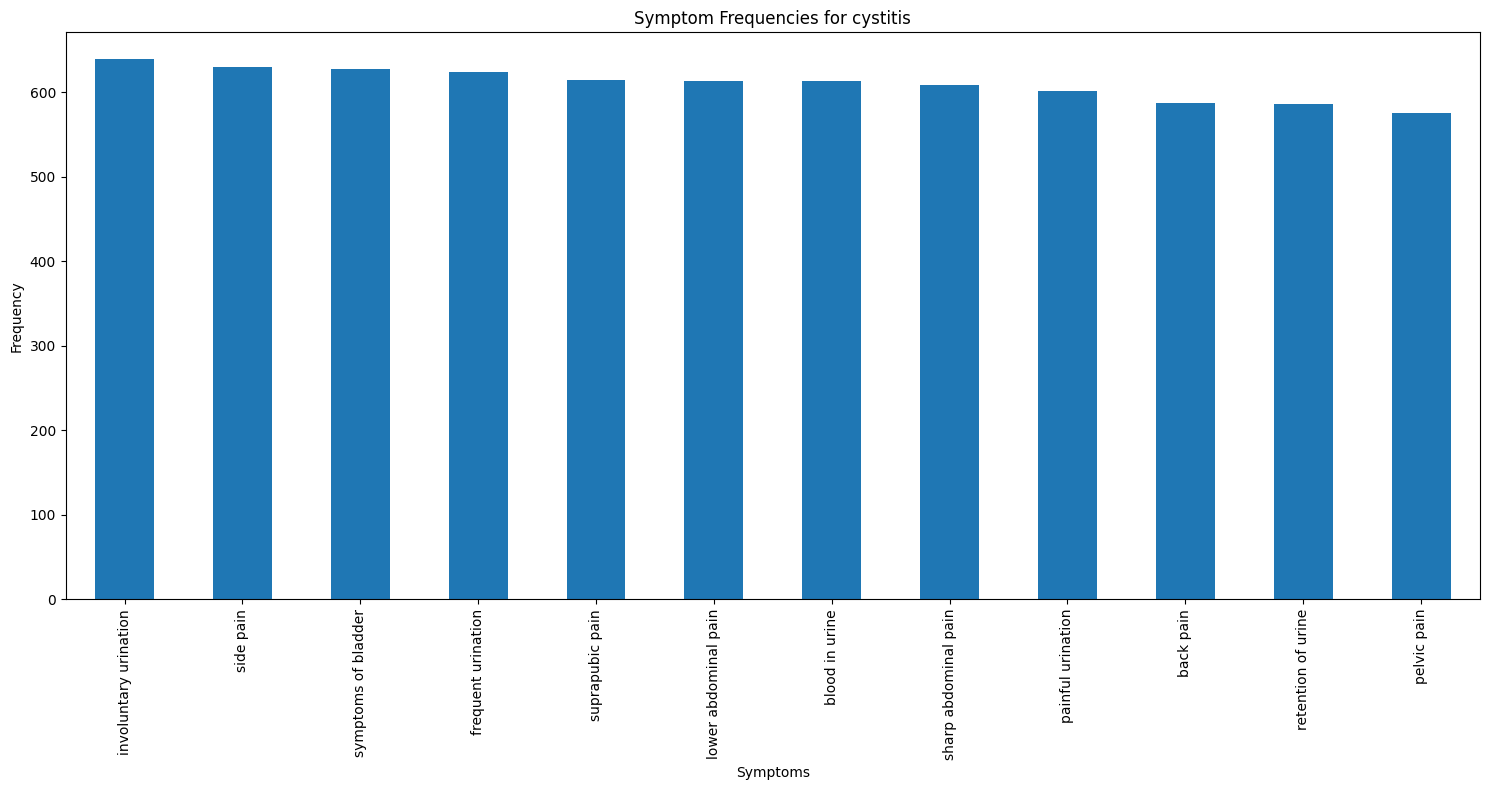

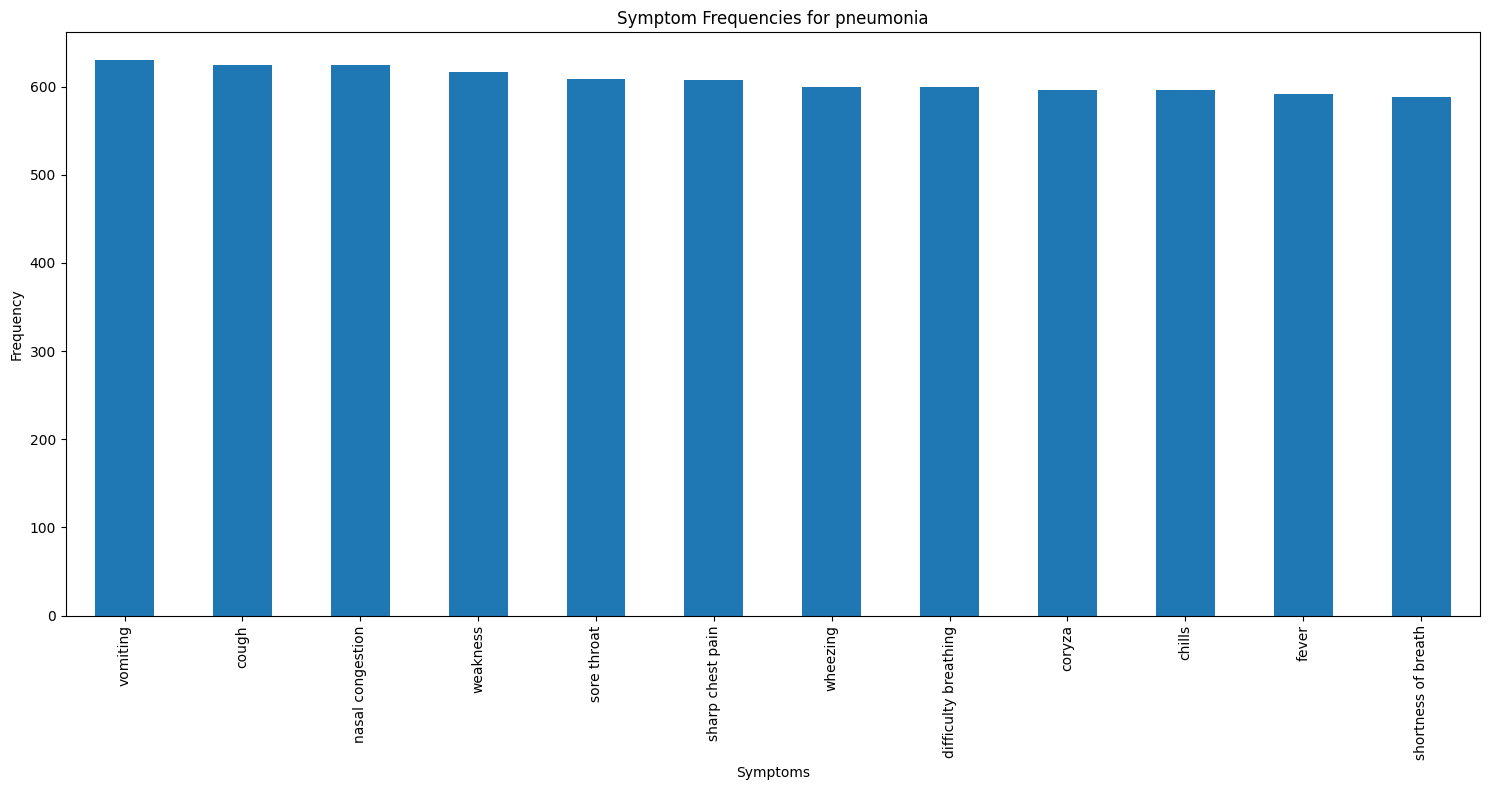

In [ ]:
# Select a few diseases of interest
selected_diseases = ['panic disorder', 'cystitis', 'pneumonia']
filtered_df = df[df['diseases'].isin(selected_diseases)]

# Calculate the frequency of each symptom for each selected disease
symptom_frequencies = {}
for disease in selected_diseases:
    disease_df = filtered_df[filtered_df['diseases'] == disease]
    symptom_counts = disease_df.drop(columns=['diseases']).sum().sort_values(ascending=False)
    symptom_frequencies[disease] = symptom_counts[symptom_counts > 0]

for disease, frequencies in symptom_frequencies.items():
    plt.figure(figsize=(15, 8))
    frequencies.plot(kind='bar')
    plt.title(f'Symptom Frequencies for {disease}')
    plt.xlabel('Symptoms')
    plt.ylabel('Frequency')
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()

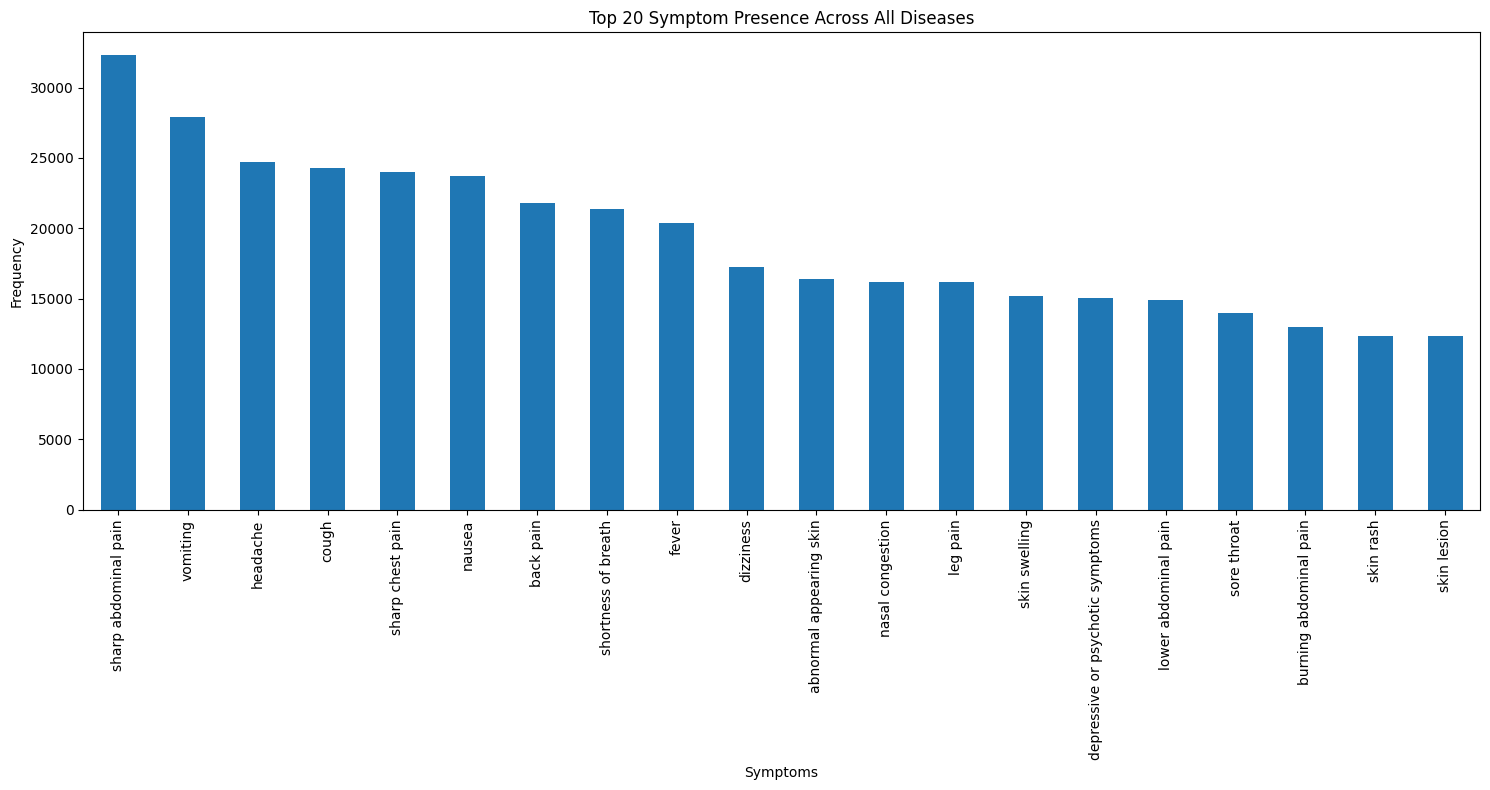

In [ ]:
symptom_df = df.drop(columns=['diseases'])
symptom_counts = symptom_df.sum()
top_20_symptoms = symptom_counts.sort_values(ascending=False).head(20)

plt.figure(figsize=(15, 8))
top_20_symptoms.plot(kind='bar')
plt.title('Top 20 Symptom Presence Across All Diseases')
plt.xlabel('Symptoms')
plt.ylabel('Frequency')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [ ]:
# Select diseases of interest
selected_diseases = ['panic disorder', 'cystitis', 'pneumonia']
filtered_df = df[df['diseases'].isin(selected_diseases)].drop(columns=['diseases'])

# Function to find frequent symptom combinations
def find_frequent_combinations(df, n=2, top_n=5):
    symptom_cols = df.columns.tolist()
    combinations = []
    from itertools import combinations as combo_iter

    for symptom_combo in combo_iter(symptom_cols, n):
        combinations.append(list(symptom_combo))
    combination_counts = {}
    for index, row in df.iterrows():
        present_symptoms = [col for col in symptom_cols if row[col] == 1]
        for combo in combo_iter(present_symptoms, n):
            sorted_combo = tuple(sorted(combo))
            combination_counts[sorted_combo] = combination_counts.get(sorted_combo, 0) + 1
    sorted_combinations = sorted(combination_counts.items(), key=lambda item: item[1], reverse=True)
    return sorted_combinations[:top_n]

for disease in selected_diseases:
    disease_df = df[df['diseases'] == disease].drop(columns=['diseases'])
    print(f"Frequent symptom combinations for {disease}:")
    print("Top 5 combinations of 2 symptoms:")
    top_2_combinations = find_frequent_combinations(disease_df, n=2, top_n=5)
    for combo, count in top_2_combinations:
        print(f"  {', '.join(combo)}: {count}")

    print("\nTop 5 combinations of 3 symptoms:")
    top_3_combinations = find_frequent_combinations(disease_df, n=3, top_n=5)
    for combo, count in top_3_combinations:
        print(f"  {', '.join(combo)}: {count}")
    print("-" * 30)

Frequent symptom combinations for panic disorder:
Top 5 combinations of 2 symptoms:
  breathing fast, depressive or psychotic symptoms: 330
  depressive or psychotic symptoms, dizziness: 325
  chest tightness, depressive or psychotic symptoms: 323
  depressive or psychotic symptoms, insomnia: 319
  abnormal involuntary movements, depressive or psychotic symptoms: 317

Top 5 combinations of 3 symptoms:
  breathing fast, depressive or psychotic symptoms, insomnia: 179
  abnormal involuntary movements, depressive or psychotic symptoms, dizziness: 178
  anxiety and nervousness, depressive or psychotic symptoms, dizziness: 173
  breathing fast, depressive or psychotic symptoms, irregular heartbeat: 171
  depression, depressive or psychotic symptoms, dizziness: 171
------------------------------
Frequent symptom combinations for cystitis:
Top 5 combinations of 2 symptoms:
  involuntary urination, side pain: 336
  involuntary urination, sharp abdominal pain: 327
  involuntary urination, lower

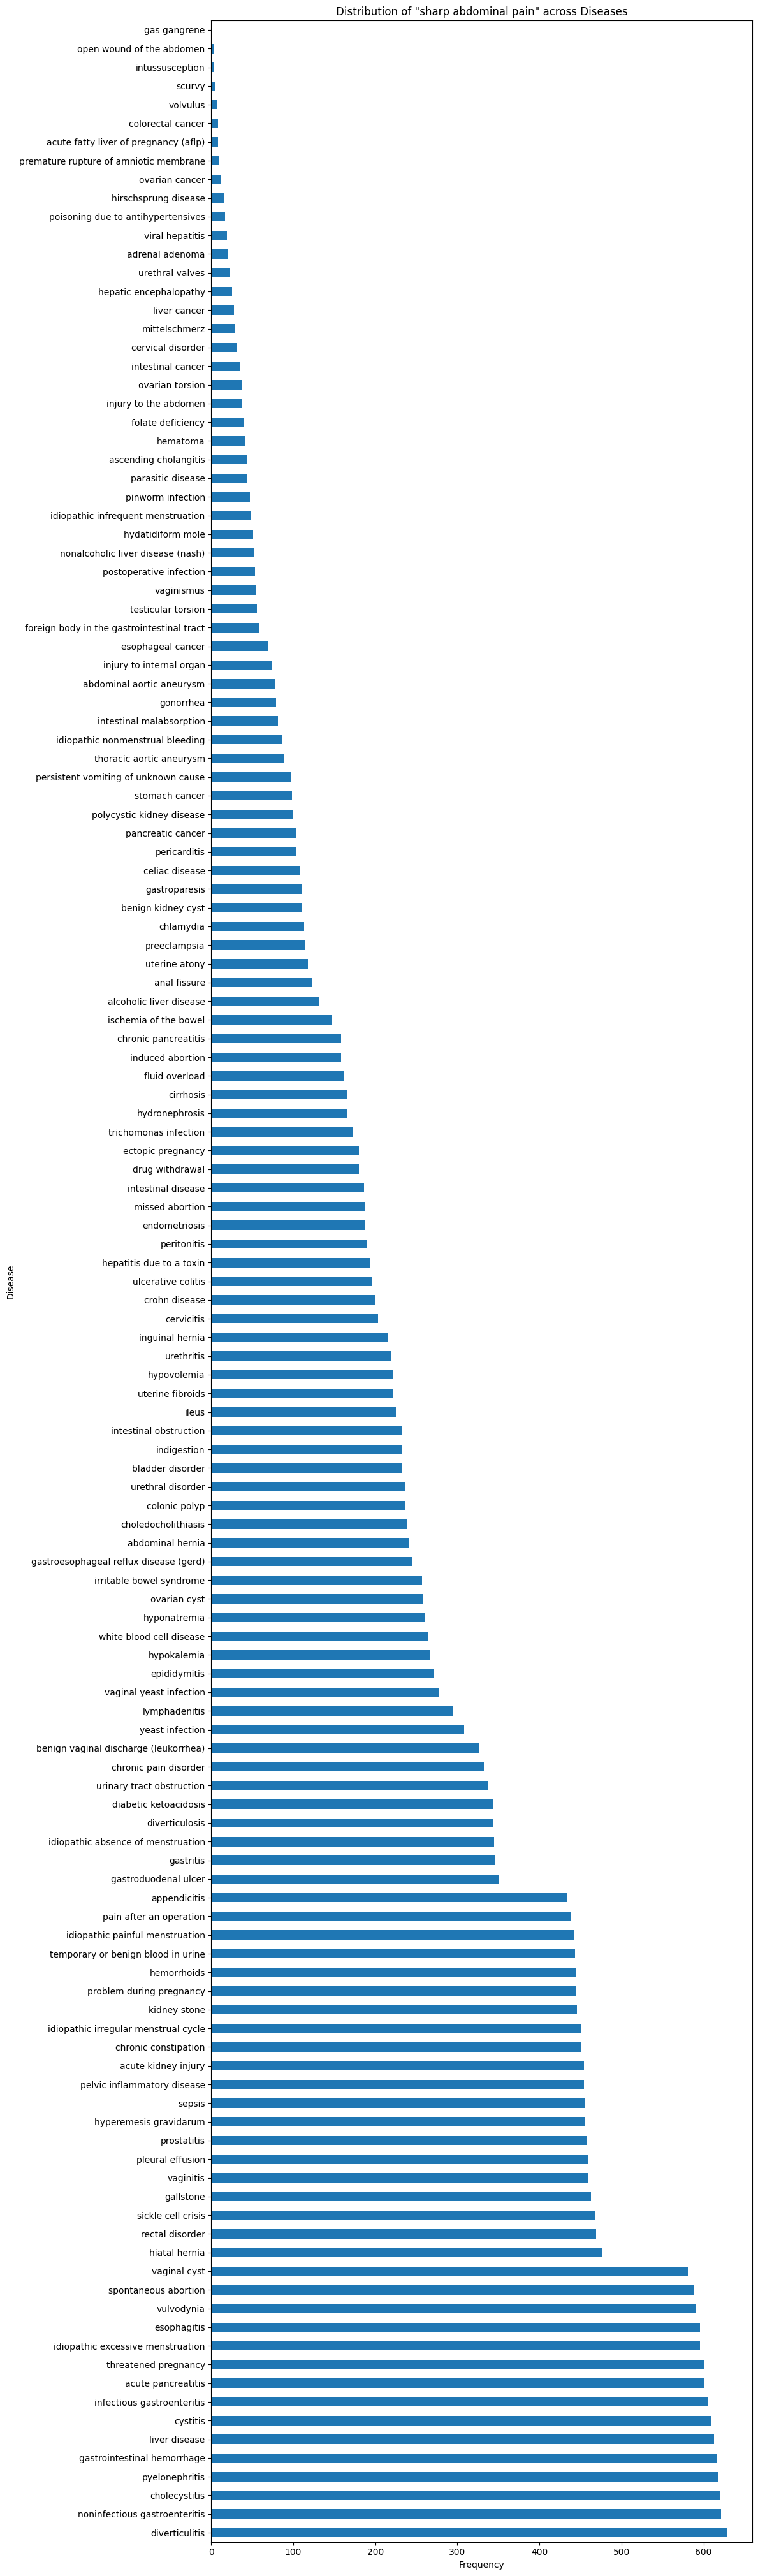

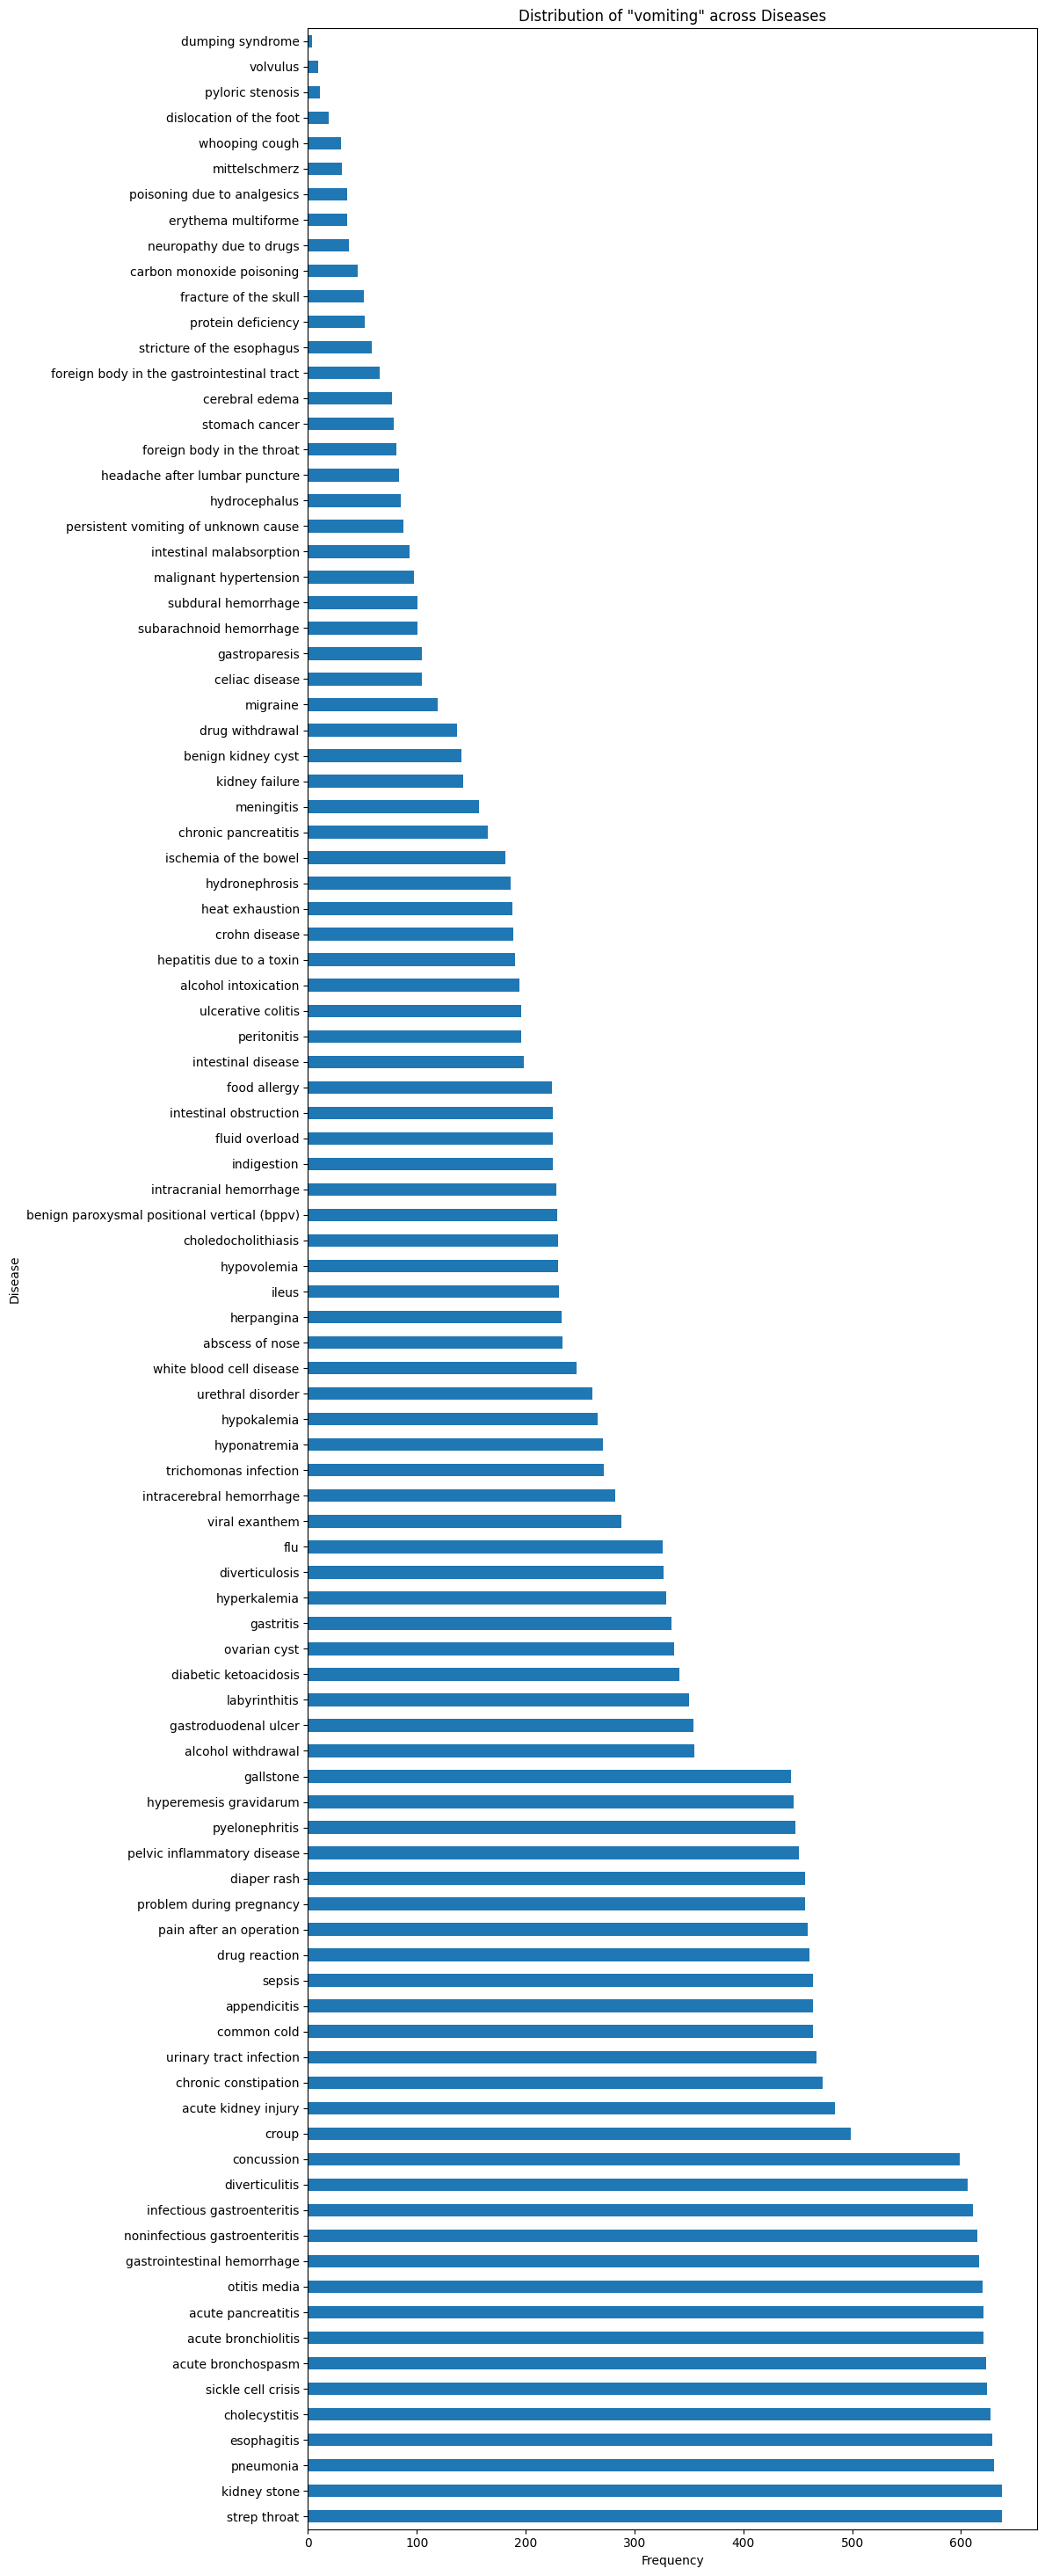

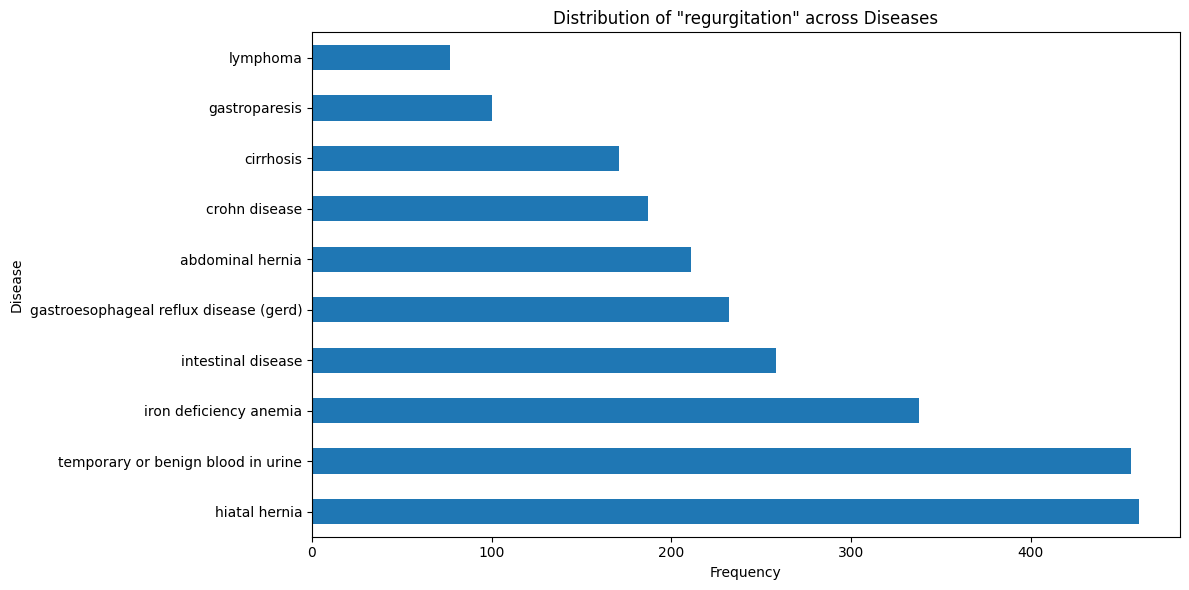

In [ ]:
selected_symptoms = ['sharp abdominal pain', 'vomiting', 'regurgitation']
for symptom in selected_symptoms:
    diseases_with_symptom = df[df[symptom] > 0]
    if not diseases_with_symptom.empty:
        # Count the occurrences of the symptom for each disease
        symptom_disease_counts = diseases_with_symptom['diseases'].value_counts()
        plt.figure(figsize=(12, max(6, len(symptom_disease_counts) * 0.3)))
        symptom_disease_counts.plot(kind='barh')
        plt.title(f'Distribution of "{symptom}" across Diseases')
        plt.xlabel('Frequency')
        plt.ylabel('Disease')
        plt.tight_layout()
        plt.show()
    else:
        print(f"Symptom '{symptom}' does not appear in any disease in the dataset.")

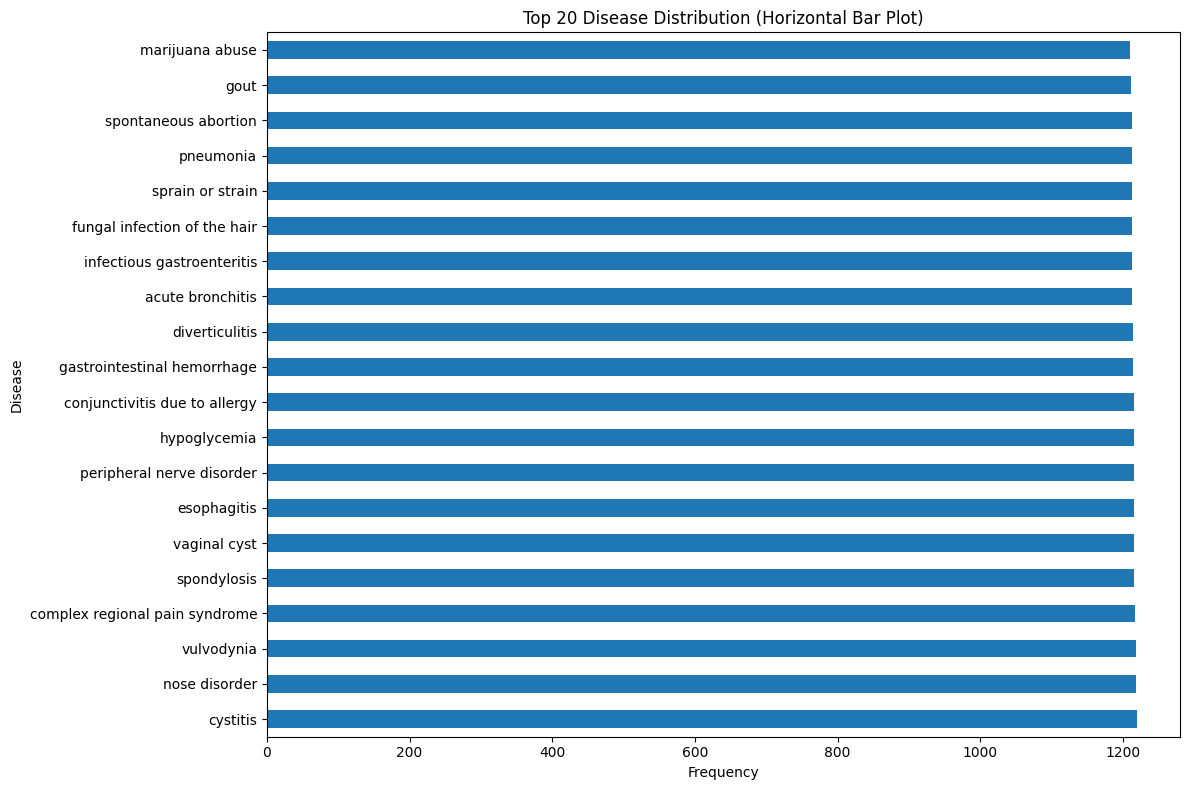

In [ ]:
disease_counts = df['diseases'].value_counts()
top_20_diseases = disease_counts.nlargest(20)

plt.figure(figsize=(12, 8))
top_20_diseases.plot(kind='barh')
plt.title('Top 20 Disease Distribution (Horizontal Bar Plot)')
plt.xlabel('Frequency')
plt.ylabel('Disease')
plt.tight_layout()
plt.show()

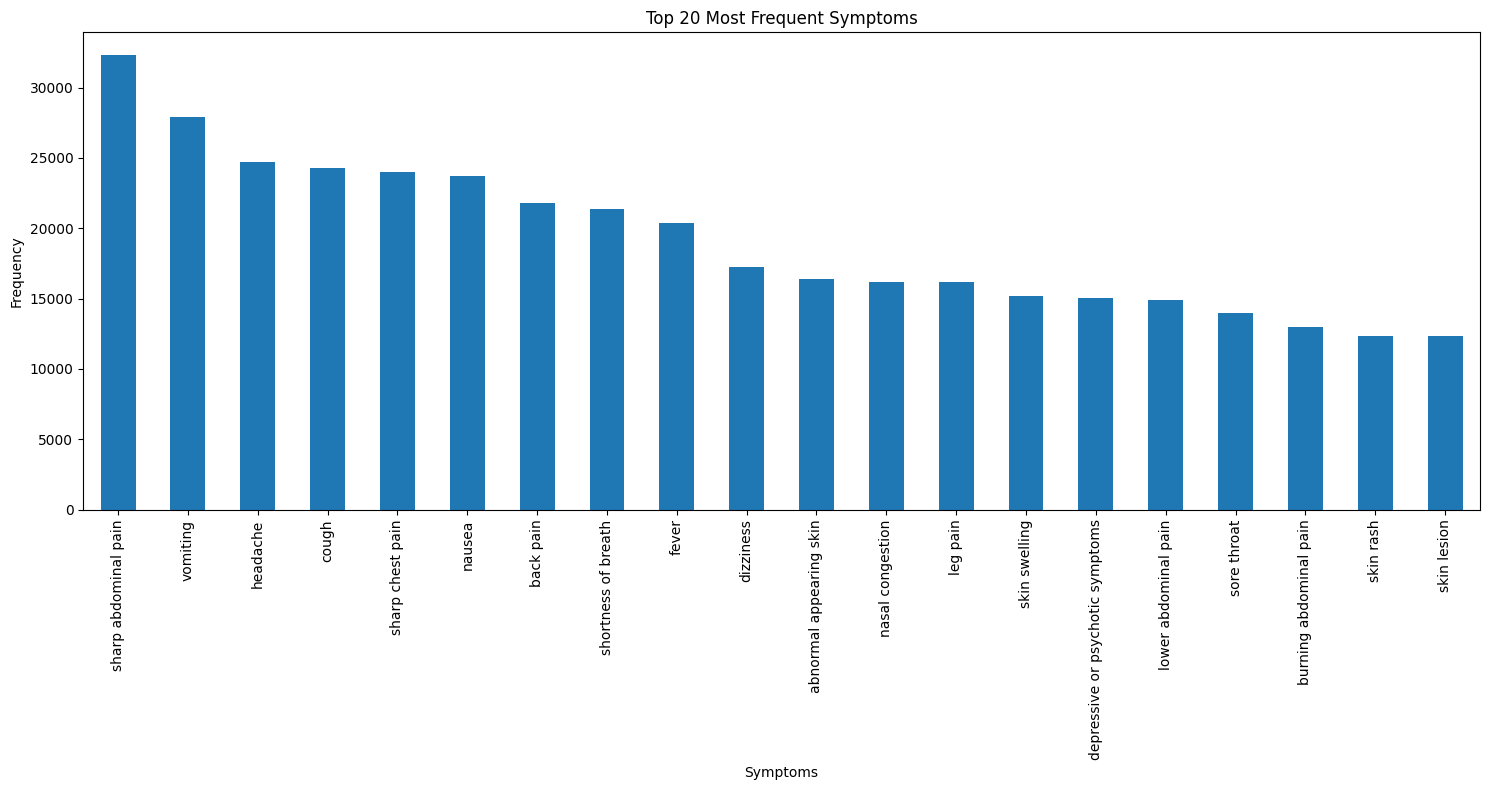

In [ ]:
symptom_counts = df.drop(columns=['diseases']).sum().sort_values(ascending=False)

top_20_symptoms = symptom_counts.head(20)

plt.figure(figsize=(15, 8))
top_20_symptoms.plot(kind='bar')
plt.title('Top 20 Most Frequent Symptoms')
plt.xlabel('Symptoms')
plt.ylabel('Frequency')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

### Feature Engineering & Model Building

In [ ]:
# Define target and feature column
X = df.drop(columns=['diseases'])
y = df['diseases']

In [ ]:
# Split training and feature column
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

* Model 1

In [ ]:
# Gaussian Naive Bayes
model_gnb = GaussianNB()

In [ ]:
# Fit training data to model
model_gnb.fit(X_train, y_train)

GaussianNB()

In [ ]:
# Make prediction
y_pred_gnb = model_gnb.predict(X_test)

In [ ]:
# Model Evaluation
accuracy_gnb = accuracy_score(y_test, y_pred_gnb)
print(f'Gaussian Naive Bayes Accuracy: {accuracy_gnb}')

Gaussian Naive Bayes Accuracy: 0.8644839944117111


In [ ]:
# Classification Report
print(classification_report(y_test, y_pred_gnb))

                                                          precision    recall  f1-score   support

                               abdominal aortic aneurysm       0.71      1.00      0.83        20
                                        abdominal hernia       0.95      0.94      0.94        81
                                         abscess of nose       0.60      0.91      0.73        58
                                     abscess of the lung       1.00      1.00      1.00         6
                                  abscess of the pharynx       0.95      0.94      0.94        63
                                    acanthosis nigricans       0.75      1.00      0.86         6
                                               acariasis       0.42      1.00      0.59         5
                                               achalasia       0.65      1.00      0.78        20
                                                    acne       0.60      0.91      0.73       103
                   

* Model 2

In [ ]:
# Logistic Regression
model_lr = LogisticRegression(max_iter=1000)

In [ ]:
# Fit training data to model
model_lr.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [ ]:
# Make prediction
y_pred_lr = model_lr.predict(X_test)

In [ ]:
# Model Evaluation
accuracy_lr = accuracy_score(y_test, y_pred_lr)
print(f'Logistic Regression Accuracy: {accuracy_lr}')

Logistic Regression Accuracy: 0.8654761181639636


In [ ]:
# Classification Report
print(classification_report(y_test, y_pred_lr))

                                                          precision    recall  f1-score   support

                               abdominal aortic aneurysm       0.74      1.00      0.85        20
                                        abdominal hernia       0.92      0.99      0.95        81
                                         abscess of nose       0.89      0.86      0.88        58
                                     abscess of the lung       1.00      1.00      1.00         6
                                  abscess of the pharynx       0.94      0.98      0.96        63
                                    acanthosis nigricans       0.86      1.00      0.92         6
                                               acariasis       0.83      1.00      0.91         5
                                               achalasia       0.73      0.80      0.76        20
                                                    acne       0.66      0.92      0.77       103
                   

* Model 3

In [ ]:
# Decision Tree Classifier
model_dt = DecisionTreeClassifier()

In [ ]:
# Fit training data to model
model_dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [ ]:
# Make prediction
y_pred_dt = model_dt.predict(X_test)

In [ ]:
# Model Evaluation
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print(f'Decision Tree Classifier Accuracy: {accuracy_dt}')

Decision Tree Classifier Accuracy: 0.8150802810342384


In [ ]:
# Classification report
print(classification_report(y_test, y_pred_dt))

                                                          precision    recall  f1-score   support

                               abdominal aortic aneurysm       0.80      1.00      0.89        20
                                        abdominal hernia       0.88      0.93      0.90        81
                                         abscess of nose       0.68      0.90      0.77        58
                                     abscess of the lung       0.86      1.00      0.92         6
                                  abscess of the pharynx       0.80      0.94      0.86        63
                                    acanthosis nigricans       0.75      1.00      0.86         6
                                               acariasis       0.45      1.00      0.62         5
                                               achalasia       0.53      0.90      0.67        20
                                                    acne       0.56      0.79      0.66       103
                   

* Model 4

In [ ]:
# K-Nearest Neighbors
model_knn = KNeighborsClassifier(n_neighbors=5)

In [ ]:
# Fit training data to model
model_knn.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
# Make prediction
y_pred_knn = model_knn.predict(X_test)

In [ ]:
# Model Evaluation
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print(f'K-Nearest Neighbors Accuracy: {accuracy_knn}')

K-Nearest Neighbors Accuracy: 0.823381724675535


In [ ]:
# Classification Report
print(classification_report(y_test, y_pred_knn))

                                                          precision    recall  f1-score   support

                               abdominal aortic aneurysm       0.71      1.00      0.83        20
                                        abdominal hernia       0.89      0.94      0.92        81
                                         abscess of nose       0.61      0.88      0.72        58
                                     abscess of the lung       0.67      1.00      0.80         6
                                  abscess of the pharynx       0.76      0.92      0.83        63
                                    acanthosis nigricans       0.67      1.00      0.80         6
                                               acariasis       0.42      1.00      0.59         5
                                               achalasia       0.48      1.00      0.65        20
                                                    acne       0.52      0.79      0.62       103
                   

### Model Comparision Graph

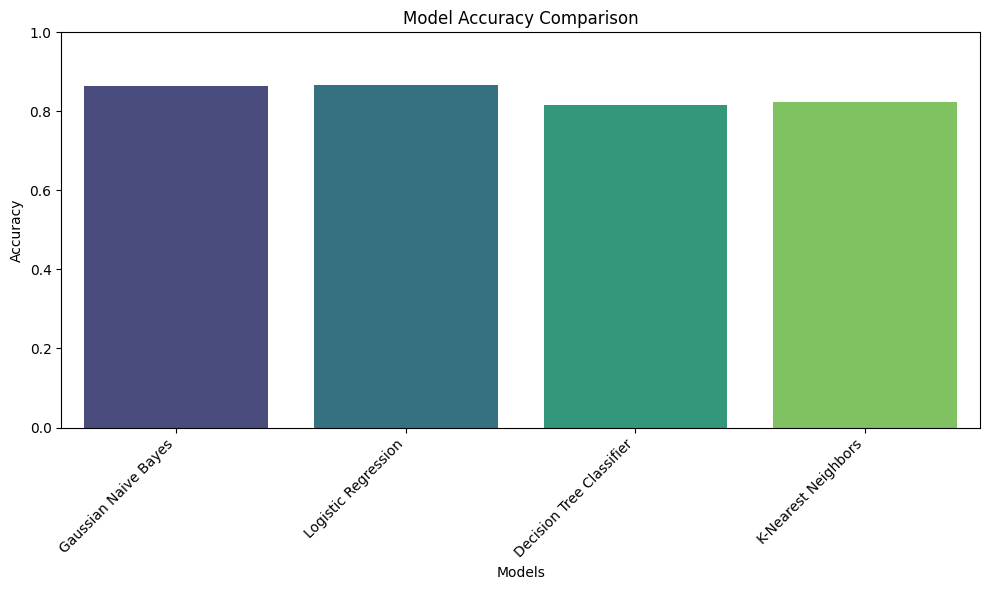

In [ ]:
# Plotting all model accuracies
model_names = ['Gaussian Naive Bayes', 'Logistic Regression', 'Decision Tree Classifier', 'K-Nearest Neighbors']
accuracies = [accuracy_gnb, accuracy_lr, accuracy_dt, accuracy_knn]

plt.figure(figsize=(10, 6))
sns.barplot(x=model_names, y=accuracies, palette='viridis')
plt.ylim(0, 1)
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Model Accuracy Comparison')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [ ]:
# Select 10 random rows from the original DataFrame
random_rows_df = df.sample(n=10, random_state=42)

In [ ]:
# Separate features and actual diseases for the random rows
random_X = random_rows_df.drop(columns=['diseases'])
random_y_actual = random_rows_df['diseases']

In [ ]:
# Make predictions using the trained model
random_y_predicted = model_dt.predict(random_X)

In [ ]:
# Create a DataFrame to display actual and predicted values
results_df = pd.DataFrame({'Actual Disease': random_y_actual,'Predicted Disease': random_y_predicted})

results_df

,Actual Disease,Predicted Disease
94355,chronic glaucoma,chronic glaucoma
76112,torticollis,torticollis
222455,personality disorder,schizophrenia
98158,fracture of the patella,fracture of the patella
57032,chronic otitis media,chronic otitis media
205978,arrhythmia,arrhythmia
56844,chronic otitis media,chronic otitis media
208063,peripheral nerve disorder,multiple sclerosis
49154,neuralgia,brachial neuritis
25719,hyperkalemia,orthostatic hypotension
